In [2]:
import matplotlib
import pandas as pd
import json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from nexa_preprocessing.utils.time_series_operations import slice_by
from py_sentimotion_mapper.sentimotion_mapper import Mapper
from coding_interpreter.metadata import Metadata

In [4]:
Mapper._load_data_if_needed()

## Emotion analysis

In [5]:
df = pd.read_csv("data/completed_export.csv")
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
...,...,...,...,...,...,...,...,...,...,...
36295,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36296,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36297,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36298,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1


In [6]:
df["emotion_id"].unique()

array([39, 10, 14,  6, 43, 26,  0, 40, 32, 22, 31, 35, 17,  1, 11,  4, 37,
        3, 30, 15, 12, 27,  2,  7, 13, 36, 33,  9, 19, 23, 16,  8,  5, 29,
       42, 25, 38, 24, 20, 21, 41, 34, 18, 28])

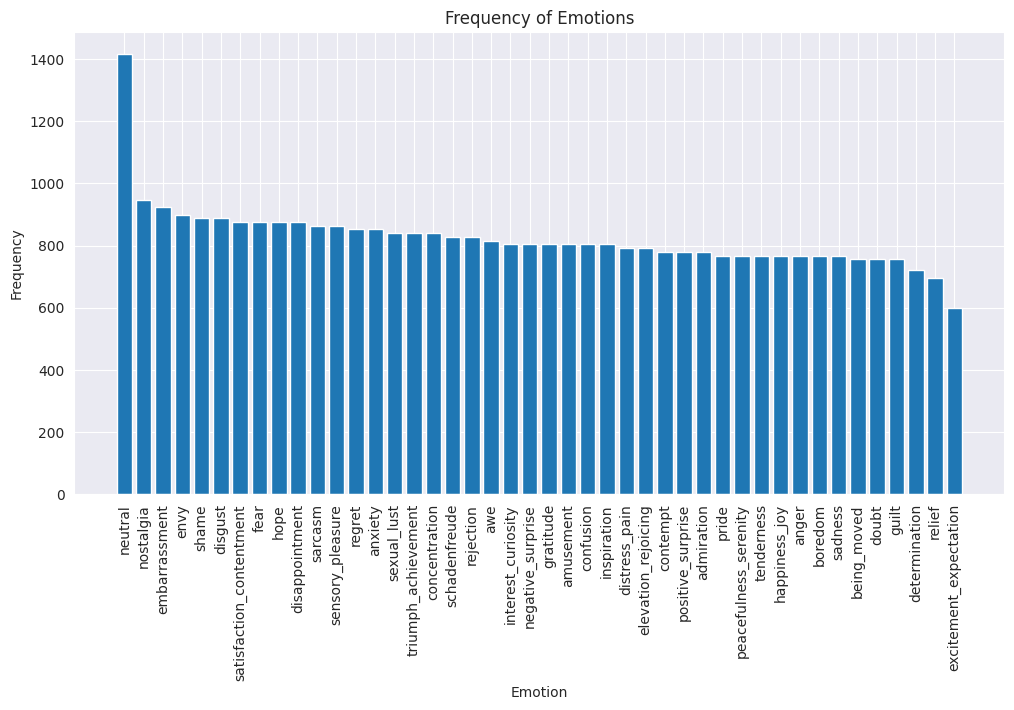

In [7]:
emotion_id_counts = df['emotion_id'].value_counts()

# Map emotion IDs to actual emotions using your Mapper class
mapped_emotions = emotion_id_counts.index.map(Mapper.get_emotion_from_id)

# Create a histogram plot
plt.figure(figsize=(12, 6))
plt.bar(mapped_emotions, emotion_id_counts.values)

# Customize the plot
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Emotions')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

### Accuracies

In [8]:
# Map emotion IDs to actual emotions using your Mapper class and create a new 'emotion' column
df['emotion'] = df['emotion_id'].map(Mapper.get_emotion_from_id)

In [9]:
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status,emotion
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,embarrassment
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,fear
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,rejection
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,sadness
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,shame
...,...,...,...,...,...,...,...,...,...,...,...
36295,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,rejection
36296,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,anxiety
36297,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,confusion
36298,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,disappointment


In [10]:
# Assuming df is your DataFrame with 'emotion_id' and 'emotion_id_reply' columns
# Add a new column 'accurate' that indicates whether the answer is accurate
df['accurate'] = df['emotion_id'] == df['emotion_id_reply']

# Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
accuracy_by_emotion = df.groupby('emotion')['accurate'].mean().reset_index()

# Rename the columns for clarity
accuracy_by_emotion.columns = ['emotion', 'accuracy']

# Print or plot the accuracy results
print(accuracy_by_emotion.sort_values(by='accuracy', ascending=False))

                     emotion  accuracy
2                      anger  0.703125
27                   neutral  0.605932
10             determination  0.579167
7              concentration  0.569048
12                   disgust  0.540541
38             schadenfreude  0.530193
6                    boredom  0.529948
18    excitement_expectation  0.506667
19                      fear  0.498858
36                   sarcasm  0.475694
8                  confusion  0.470149
35                   sadness  0.467448
30         positive_surprise  0.461538
1                  amusement  0.451493
34                    relief  0.448276
9                   contempt  0.437179
42                tenderness  0.397135
28                 nostalgia  0.391350
26         negative_surprise  0.388060
40               sexual_lust  0.386905
29     peacefulness_serenity  0.368490
22             happiness_joy  0.361979
25        interest_curiosity  0.359453
11            disappointment  0.345890
5                being_mo

## Stimulus Analysis

In [11]:
df["filename"].unique()

array(['A102_emb_p_2', 'A102_fea_p_2', 'A102_rej_p_3', ...,
       'A424_mov_p_2', 'A72_exc_v_3', 'A207_dist_v_3'], dtype=object)

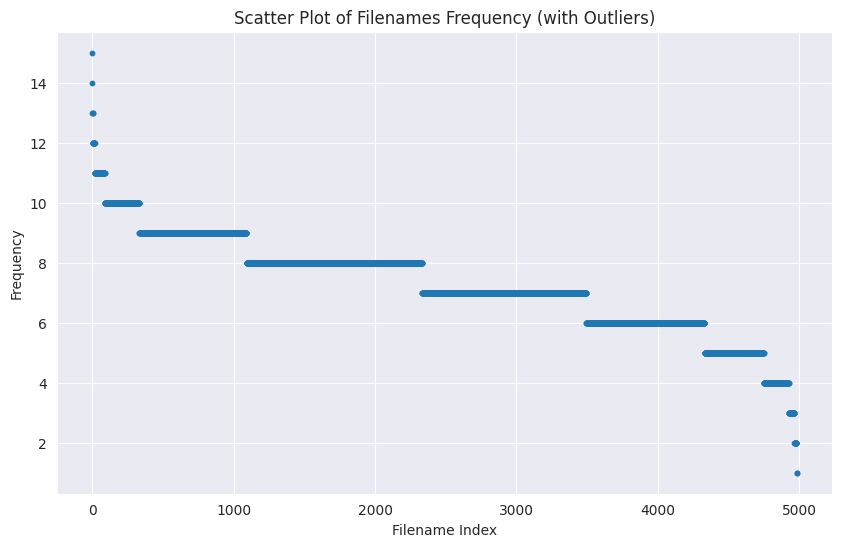

In [12]:
plt.figure(figsize=(10, 6))

# Count the frequency of each filename
filename_counts = df['filename'].value_counts()

# Create a scatter plot to visualize filename frequencies
plt.scatter(range(len(filename_counts)), filename_counts, marker='o', s=10)

# Customize the plot
plt.xlabel('Filename Index')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Filenames Frequency (with Outliers)')

# Show the plot
plt.show()

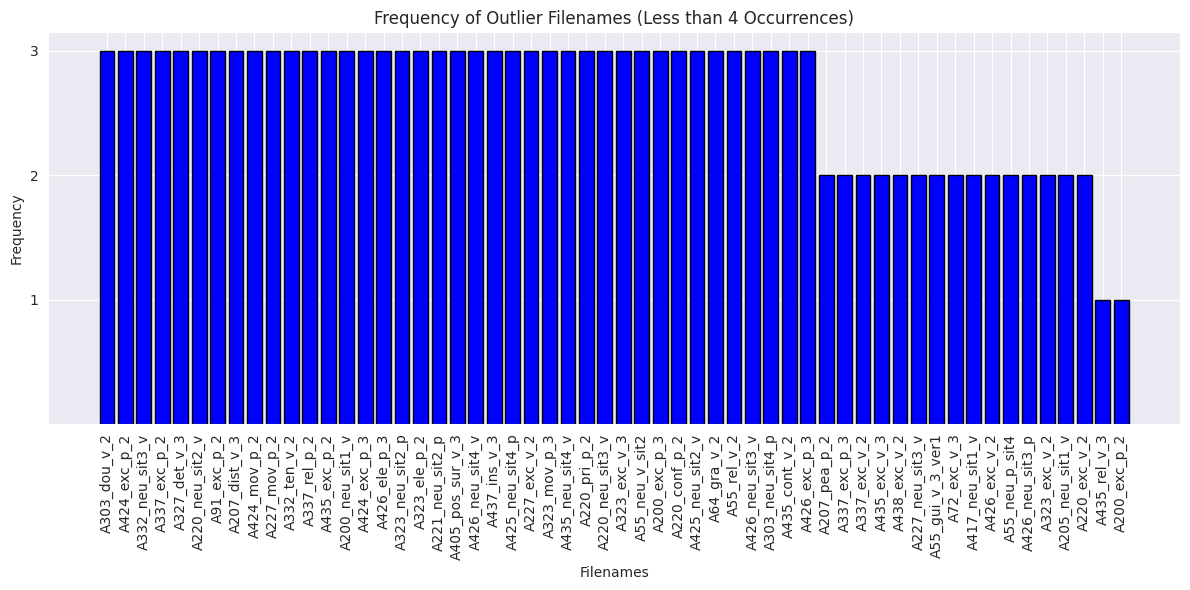

In [13]:
plt.figure(figsize=(12, 6))

# Count the frequency of each filename
filename_counts = df['filename'].value_counts()

# Define a threshold for outliers (e.g., less than 4 occurrences)
threshold = 4

# Filter filenames with less than the threshold occurrences
outlier_filenames = filename_counts[filename_counts < threshold].index.tolist()

# Create a DataFrame with outlier filenames and their frequencies
outlier_df = pd.DataFrame({'Filename': outlier_filenames, 'Frequency': [filename_counts[filename] for filename in outlier_filenames]})

# Sort the DataFrame by frequency in descending order
outlier_df = outlier_df.sort_values(by='Frequency', ascending=False)

# Round frequencies to integers
outlier_df['Frequency'] = outlier_df['Frequency'].astype(int)

# Create a bar plot
plt.bar(outlier_df['Filename'], outlier_df['Frequency'], color='blue', edgecolor='black')

# Customize the plot
plt.xlabel('Filenames')
plt.ylabel('Frequency')
plt.title('Frequency of Outlier Filenames (Less than 4 Occurrences)')

# Set y-ticks to discrete values
yticks = np.arange(outlier_df['Frequency'].min(), outlier_df['Frequency'].max() + 1, 1)
plt.yticks(yticks)

plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Group the data by 'filename' and calculate the mean accuracy for each filename
accuracy_by_filename = df.groupby('filename')['accurate'].mean()

# Reset the index to make 'filename' a regular column in the result
accuracy_by_filename = accuracy_by_filename.reset_index()

# Rename the columns for clarity
accuracy_by_filename.columns = ['filename', 'accuracy']

# Sort the DataFrame by accuracy (best first)
accuracy_by_filename = accuracy_by_filename

# Display the result
print(accuracy_by_filename)

          filename  accuracy
0     A102_adm_p_2  0.000000
1     A102_adm_p_3  0.428571
2     A102_adm_v_2  0.000000
3     A102_adm_v_3  0.222222
4     A102_amu_p_2  0.000000
...            ...       ...
4977   A91_ten_v_3  0.500000
4978   A91_tri_p_2  0.200000
4979   A91_tri_p_3  0.250000
4980   A91_tri_v_2  0.000000
4981   A91_tri_v_3  0.000000

[4982 rows x 2 columns]


In [32]:
def assert_metadata_match(filenames):
    """
    Sanity check! Assert that some metadata properties are equal for all filenames
    :param filenames: list of filenames
    """
    reference_meta = Metadata(filenames[0])
    for filename in filenames:
        
        # Create a new meta object for the current filename
        current_meta = Metadata(filename)
        
        # print(vars(reference_meta))
        # print(vars(current_meta))
        
        # Compare metadata properties with the reference
        assert reference_meta.intensity_level == current_meta.intensity_level, f'Intensity level mismatch for {filename}'
        assert reference_meta.mode == current_meta.mode, f'Mode mismatch for {filename}'
        assert reference_meta.emotion_1 == current_meta.emotion_1, f'Emotion mismatch for {filename}'
        assert reference_meta.emotion_1_id == current_meta.emotion_1_id, f'Emotion id mismatch for {filename}'
        assert reference_meta.emotion_1_valence == current_meta.emotion_1_valence, f'Valence id mismatch for {filename}'
        

In [34]:
slices = slice_by(df, "filename")
for df_ in slices:
    unique_aliases = df_["alias"].unique()
    coverage = len(unique_aliases)
    
    filenames = df_["filename"].unique()
    print(len(filenames))
    
    # assert_metadata_match(filenames)
    
    
        
        
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [22]:
print(vars(meta))

{'filename': 'A102_emb_p_2', 'name_list': ['A102', 'emb', 'p', '2'], 'video_id': 'A102', 'mix': 0, 'emotion_1': 'emb', 'emotion_1_id': 39, 'emotion_2': None, 'emotion_2_id': 100, 'proportions': 0, 'mode': 'p', 'intensity_level': 2, 'version': 1, 'situation': 1, 'emotion_1_valence': 'neg', 'emotion_2_valence': None, 'error': 0}
